In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/VELDHUIZEN/node18.html - MSE definition,
CR - ratio of original size to compressed size

In [15]:
def CreateCompressedImages(path_to_original, qualities):
    img = Image.open(path_to_original)
    ar=np.array(img)
    fig, ax = plt.subplots(1, len(qualities)+1, figsize=(40,40))
    original_size = os.path.getsize(path_to_original)
    print(f"{path_to_original}: size={original_size} shape={ar.shape}")
    for i, q in enumerate(qualities):
        f_name = path_to_original+'_'+str(q)+'.jpg'
        img.save(f_name, optimize=True, quality=q)
        csize = os.path.getsize(f_name)
        compressed_image = Image.open(f_name)
        car = np.array(compressed_image)
        mse = ((ar - car)**2).mean()
        print(f"q={q} size={csize} CR={original_size/csize} shape={car.shape} MSE={mse}")
        ax[i].imshow(compressed_image)
        ax[i].set_title(f_name,fontsize=30)
    ax[len(qualities)].imshow(img)
    ax[len(qualities)].set_title(path_to_original, fontsize=30)
    plt.show()

image.jpg: size=611140 shape=(2560, 3200, 3)
q=10 size=71862 CR=8.50435557039882 shape=(2560, 3200, 3) MSE=31.38354345703125
q=50 size=216082 CR=2.828278153663887 shape=(2560, 3200, 3) MSE=3.9352183837890626
q=90 size=696682 CR=0.8772151426332243 shape=(2560, 3200, 3) MSE=0.41137544759114586


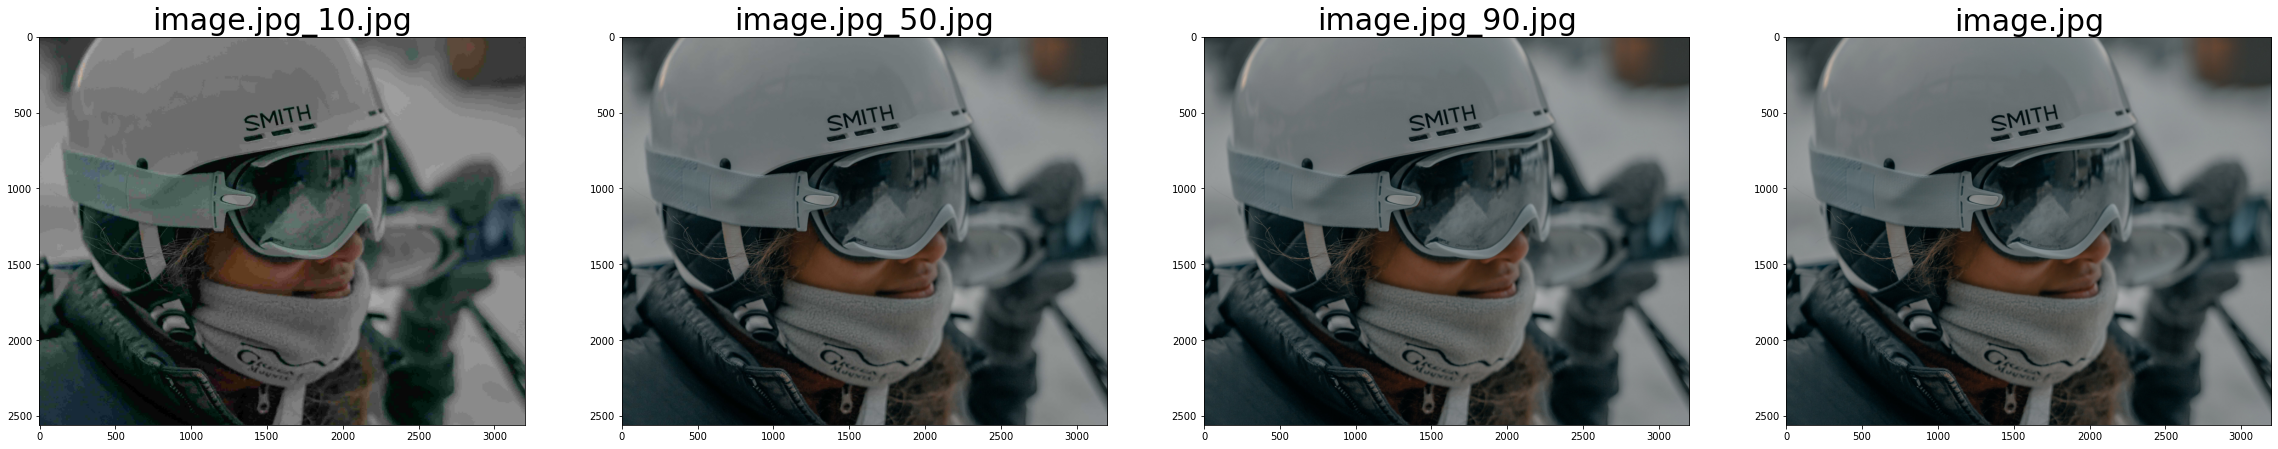

In [16]:
CreateCompressedImages('image.jpg', [10, 50, 90])